## Import and prepare the Data Set.

In [2]:
import pandas as pd
from sklearn.ensemble import IsolationForest
import numpy as np
import matplotlib.pyplot as plt

/tmp/ipykernel_3423/3205241020.py:15: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x,y, c=colors,cmap='RdYlGn', edgecolor='k')


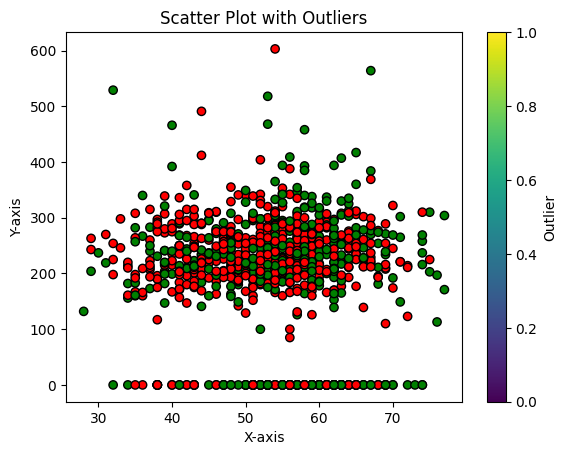

     Age  Sex  RestingBP  Cholesterol  FastingBS  MaxHR  ExerciseAngina  \
0     40    1        140          289          0    172               0   
3     48    0        138          214          0    108               1   
4     54    1        150          195          0    122               0   
5     39    1        120          339          0    170               0   
6     45    0        130          237          0    170               0   
..   ...  ...        ...          ...        ...    ...             ...   
911   59    1        164          176          1     90               0   
912   57    0        140          241          0    123               1   
914   68    1        144          193          1    141               0   
915   57    1        130          131          0    115               1   
917   38    1        138          175          0    173               0   

     Oldpeak  HeartDisease  ST_Slope_Flat  ST_Slope_Up  RestingECG_Normal  \
0        0.0          

/tmp/ipykernel_3423/3205241020.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned1.drop(['outlier'], axis=1, inplace=True)


In [3]:
df = pd.read_csv('heart.csv')
df['Sex'] = df['Sex'].map({'F' : 0, 'M' : 1})
df['ExerciseAngina'] = df['ExerciseAngina'].map({'N' : 0, 'Y' : 1})
# df['ST_Slope'] = df['ST_Slope'].map({'Flat' : 0, 'Up' : 1})
df = pd.get_dummies(df, columns=['ST_Slope'], drop_first = True)         
df = pd.get_dummies(df, columns=['RestingECG'], drop_first = True)         
df = pd.get_dummies(df, columns=['ChestPainType'], drop_first = True)                   
# Create an instance of the algorithm
model=IsolationForest()
# Apply algorithm to data
df['outlier']=pd.Series(model.fit_predict(df.values))
colors = ['red' if outlier == 1 else 'green' for outlier in df.outlier]
x = df['Age']
y = df['Cholesterol']
plt.scatter(x,y, c=colors,cmap='RdYlGn', edgecolor='k')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot with Outliers')
# Add a colorbar legend
cbar = plt.colorbar()
cbar.set_label('Outlier')
plt.show()
# Remove rows where there is -1 in created column
df_cleaned1 =df[df.outlier!=-1]
# # Drop created column
df_cleaned1.drop(['outlier'], axis=1, inplace=True)
print(df_cleaned1)

/tmp/ipykernel_3423/117084149.py:17: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x,y, c=colors,cmap='RdYlGn', edgecolor='k')


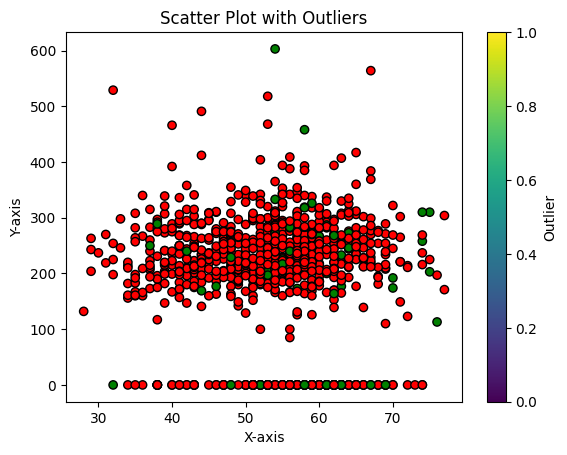

(918, 17)


/tmp/ipykernel_3423/117084149.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned2.drop(['outlier'], axis=1, inplace=True)


In [4]:
from sklearn.covariance import EllipticEnvelope
import matplotlib.pyplot as plt

import pandas as pd
df = pd.read_csv('heart.csv')
df['Sex'] = df['Sex'].map({'F' : 0, 'M' : 1})
df['ExerciseAngina'] = df['ExerciseAngina'].map({'N' : 0, 'Y' : 1})
# df['ST_Slope'] = df['ST_Slope'].map({'Flat' : 0, 'Up' : 1})
df = pd.get_dummies(df, columns=['ST_Slope'], drop_first = True)         
df = pd.get_dummies(df, columns=['RestingECG'], drop_first = True)         
df = pd.get_dummies(df, columns=['ChestPainType'], drop_first = True)            
model=EllipticEnvelope()
df['outlier']=pd.Series(model.fit_predict(df.values))
colors = ['red' if outlier == 1 else 'green' for outlier in df.outlier]
x = df['Age']
y = df['Cholesterol']
plt.scatter(x,y, c=colors,cmap='RdYlGn', edgecolor='k')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot with Outliers')
# Add a colorbar legend
cbar = plt.colorbar()
cbar.set_label('Outlier')
plt.show()
df_cleaned2 = df[df.outlier!=-1]
df_cleaned2.drop(['outlier'], axis=1, inplace=True)

print(df.shape)


/tmp/ipykernel_3423/1003025669.py:15: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x,y, c=colors,cmap='RdYlGn', edgecolor='k')


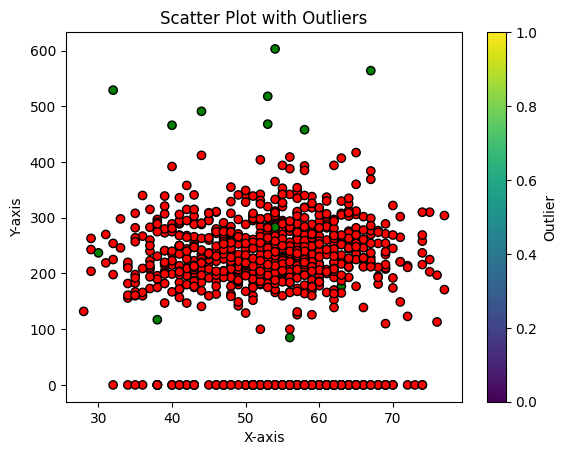

/tmp/ipykernel_3423/1003025669.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned3.drop(['outlier'], axis=1, inplace=True)


In [5]:
from sklearn.neighbors import LocalOutlierFactor
import matplotlib.pyplot as plt
df = pd.read_csv('heart.csv')
df['Sex'] = df['Sex'].map({'F' : 0, 'M' : 1})
df['ExerciseAngina'] = df['ExerciseAngina'].map({'N' : 0, 'Y' : 1})
# df['ST_Slope'] = df['ST_Slope'].map({'Flat' : 0, 'Up' : 1})
df = pd.get_dummies(df, columns=['ST_Slope'], drop_first = True)         
df = pd.get_dummies(df, columns=['RestingECG'], drop_first = True)         
df = pd.get_dummies(df, columns=['ChestPainType'], drop_first = True)    
model=LocalOutlierFactor()
df['outlier']=pd.Series(model.fit_predict(df.values))
colors = ['red' if outlier == 1 else 'green' for outlier in df.outlier]
x = df['Age']
y = df['Cholesterol']
plt.scatter(x,y, c=colors,cmap='RdYlGn', edgecolor='k')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot with Outliers')
# Add a colorbar legend
cbar = plt.colorbar()
cbar.set_label('Outlier')
plt.show()
df_cleaned3=df[df.outlier!=-1]
df_cleaned3.drop(['outlier'], axis=1, inplace=True)


/tmp/ipykernel_3423/3757834985.py:15: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x,y, c=colors,cmap='RdYlGn', edgecolor='k')


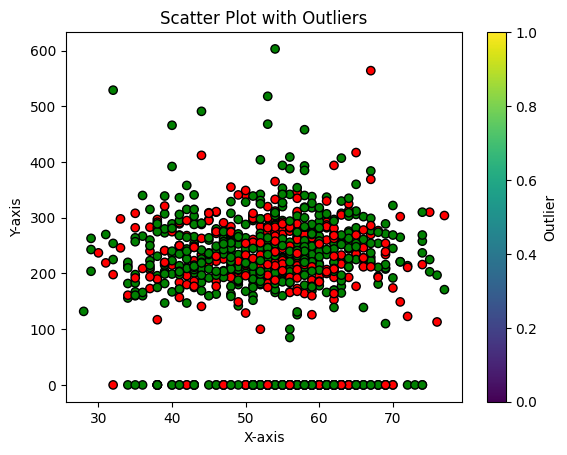

(918, 17)


/tmp/ipykernel_3423/3757834985.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned4.drop(['outlier'], axis=1, inplace=True)


In [6]:
from sklearn.svm import OneClassSVM
import pandas as pd
df = pd.read_csv('heart.csv')
df['Sex'] = df['Sex'].map({'F' : 0, 'M' : 1})
df['ExerciseAngina'] = df['ExerciseAngina'].map({'N' : 0, 'Y' : 1})
# df['ST_Slope'] = df['ST_Slope'].map({'Flat' : 0, 'Up' : 1})
df = pd.get_dummies(df, columns=['ST_Slope'], drop_first = True)         
df = pd.get_dummies(df, columns=['RestingECG'], drop_first = True)         
df = pd.get_dummies(df, columns=['ChestPainType'], drop_first = True)    
model=OneClassSVM(gamma='auto')
df['outlier']=pd.Series(model.fit_predict(df.values))
colors = ['red' if outlier == 1 else 'green' for outlier in df.outlier]
x = df['Age']
y = df['Cholesterol']
plt.scatter(x,y, c=colors,cmap='RdYlGn', edgecolor='k')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot with Outliers')
# Add a colorbar legend
cbar = plt.colorbar()
cbar.set_label('Outlier')
plt.show()
df_cleaned4=df[df.outlier!=-1]
df_cleaned4.drop(['outlier'], axis=1, inplace=True)
print(df.shape)

## Import and prepare the Data Set.

In [7]:
import pandas as pd
import numpy as np
df1 = pd.read_csv('Pokemon.csv')
print(df.corr())
df1['Legendary'] = df1['Legendary'].map({False : 0, True : 1})
# df1 = pd.get_dummies(df1, columns=['Type 1'], drop_first = True)     
# df1 = pd.get_dummies(df1, columns=['Type 2'], drop_first = True)  
df1 = df1.drop('Name', axis = 1)
df1

                        Age       Sex  RestingBP  Cholesterol  FastingBS  \
Age                1.000000  0.055750   0.254399    -0.095282   0.198039   
Sex                0.055750  1.000000   0.005133    -0.200092   0.120076   
RestingBP          0.254399  0.005133   1.000000     0.100893   0.070193   
Cholesterol       -0.095282 -0.200092   0.100893     1.000000  -0.260974   
FastingBS          0.198039  0.120076   0.070193    -0.260974   1.000000   
MaxHR             -0.382045 -0.189186  -0.112135     0.235792  -0.131438   
ExerciseAngina     0.215793  0.190664   0.155101    -0.034166   0.060451   
Oldpeak            0.258612  0.105734   0.164803     0.050148   0.052698   
HeartDisease       0.282039  0.305445   0.107589    -0.232741   0.267291   
ST_Slope_Flat      0.185568  0.116077   0.099207    -0.050953   0.107006   
ST_Slope_Up       -0.258067 -0.150942  -0.096146     0.094027  -0.161730   
RestingECG_Normal -0.230566 -0.010634  -0.116851    -0.038470  -0.093028   
RestingECG_S

,#,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Grass,Poison,318,45,49,49,65,65,45,1,0
1,2,Grass,Poison,405,60,62,63,80,80,60,1,0
2,3,Grass,Poison,525,80,82,83,100,100,80,1,0
3,3,Grass,Poison,625,80,100,123,122,120,80,1,0
4,4,Fire,NaN,309,39,52,43,60,50,65,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Rock,Fairy,600,50,100,150,100,150,50,6,1
796,719,Rock,Fairy,700,50,160,110,160,110,110,6,1
797,720,Psychic,Ghost,600,80,110,60,150,130,70,6,1
798,720,Psychic,Dark,680,80,160,60,170,130,80,6,1


## It can be noticed that ,,Total,, and ,,Sp. Atk,, correlate the most with the target columns

In [9]:
df2 = pd.DataFrame([df['Total'],df['Sp. Atk']])
df2 = df2.T
print(df2)

KeyError: 'Total'

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop('Legendary', axis = 1)
Y = df['Legendary']
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.25, random_state = 12)

## Train and predict using the Isolation Forest, OneClassSVM, Elliptic Envelope, and LocalOutlierFactor

In [88]:
from sklearn.ensemble import IsolationForest

df2 = pd.read_csv('Pokemon.csv')
df2['Legendary'] = df2['Legendary'].map({False : 0, True : 1})
df2 = pd.get_dummies(df2, columns=['Type 1'], drop_first = True)     
df2 = pd.get_dummies(df2, columns=['Type 2'], drop_first = True)  
df2 = df2.drop('Name', axis = 1)

clf = IsolationForest().fit(df2)
df2['outlier']=pd.Series(clf.fit_predict(df2.values))
df2

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,...,Type 2_Grass,Type 2_Ground,Type 2_Ice,Type 2_Normal,Type 2_Poison,Type 2_Psychic,Type 2_Rock,Type 2_Steel,Type 2_Water,outlier
0,1,318,45,49,49,65,65,45,1,0,...,0,0,0,0,1,0,0,0,0,1
1,2,405,60,62,63,80,80,60,1,0,...,0,0,0,0,1,0,0,0,0,1
2,3,525,80,82,83,100,100,80,1,0,...,0,0,0,0,1,0,0,0,0,1
3,3,625,80,100,123,122,120,80,1,0,...,0,0,0,0,1,0,0,0,0,1
4,4,309,39,52,43,60,50,65,1,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,600,50,100,150,100,150,50,6,1,...,0,0,0,0,0,0,0,0,0,1
796,719,700,50,160,110,160,110,110,6,1,...,0,0,0,0,0,0,0,0,0,1
797,720,600,80,110,60,150,130,70,6,1,...,0,0,0,0,0,0,0,0,0,1
798,720,680,80,160,60,170,130,80,6,1,...,0,0,0,0,0,0,0,0,0,1


In [89]:
from sklearn.covariance import EllipticEnvelope
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df3 = pd.read_csv('Pokemon.csv')
df3['Legendary'] = df3['Legendary'].map({False : 0, True : 1})
df3 = pd.get_dummies(df3, columns=['Type 1'], drop_first = True)     
df3 = pd.get_dummies(df3, columns=['Type 2'], drop_first = True)  
df3 = df3.drop('Name', axis = 1)

model=EllipticEnvelope()
df3['outlier']=pd.Series(model.fit_predict(df3.values))

print(df3)


/home/tudor/.local/lib/python3.10/site-packages/sklearn/covariance/_robust_covariance.py:745: UserWarning: The covariance matrix associated to your dataset is not full rank
  warnings.warn(


       #  Total  HP  Attack  Defense  Sp. Atk  Sp. Def  Speed  Generation  \
0      1    318  45      49       49       65       65     45           1   
1      2    405  60      62       63       80       80     60           1   
2      3    525  80      82       83      100      100     80           1   
3      3    625  80     100      123      122      120     80           1   
4      4    309  39      52       43       60       50     65           1   
..   ...    ...  ..     ...      ...      ...      ...    ...         ...   
795  719    600  50     100      150      100      150     50           6   
796  719    700  50     160      110      160      110    110           6   
797  720    600  80     110       60      150      130     70           6   
798  720    680  80     160       60      170      130     80           6   
799  721    600  80     110      120      130       90     70           6   

     Legendary  ...  Type 2_Grass  Type 2_Ground  Type 2_Ice  Type 2_Normal

In [117]:
from sklearn.neighbors import LocalOutlierFactor
import pandas as pd


df4 = pd.read_csv('Pokemon.csv')
df4['Legendary'] = df4['Legendary'].map({False : 0, True : 1})
df4 = pd.get_dummies(df4, columns=['Type 1'], drop_first = True)     
df4 = pd.get_dummies(df4, columns=['Type 2'], drop_first = True)  
df4 = df4.drop('Name', axis = 1)

model = LocalOutlierFactor()
df4['outliers'] = model.fit_predict(df4)
k = 0
for i in df4.outliers:
    if i == -1:
        k = k + 1
print(k)


11


In [118]:
from sklearn.svm import OneClassSVM
import pandas as pd

df5 = pd.read_csv('Pokemon.csv')
df5['Legendary'] = df5['Legendary'].map({False : 0, True : 1})
df5 = pd.get_dummies(df5, columns=['Type 1'], drop_first = True)     
df5 = pd.get_dummies(df5, columns=['Type 2'], drop_first = True)  
df5 = df5.drop('Name', axis = 1)

model = OneClassSVM()
df5['outliers'] = model.fit_predict(df)

k = 0
for i in df5.outliers:
    if i == -1:
        k = k + 1
print(k)

400


## Create a grid 2x2 on scatter plots with the different colors for normal samples and outliers for each algorithm.

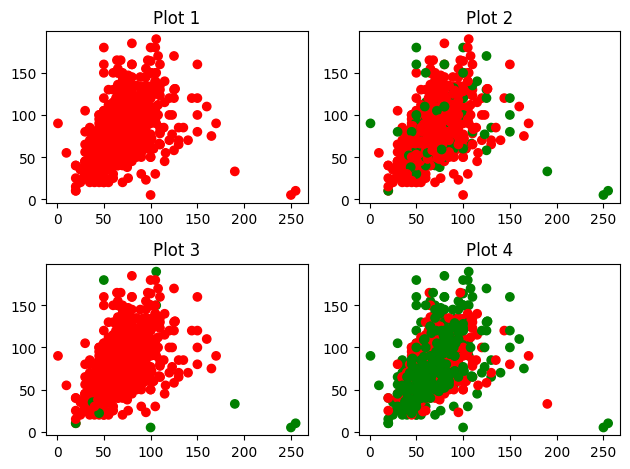

In [116]:
import matplotlib.pyplot as plt
import numpy as np

x1 = df2['HP']
y1 = df2['Attack']

x2 = df3['HP']
y2 = df3['Attack']

x3 = df4['HP']
y3 = df4['Attack']

x4 = df5['HP']
y4 = df5['Attack']
# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2)
colors = ['red' if outlier == 1 else 'green' for outlier in df2.outlier]
axs[0, 0].scatter(x1, y1,c=colors)
axs[0, 0].set_title('Plot 1')

colors = ['red' if outlier == 1 else 'green' for outlier in df3.outlier]
axs[0, 1].scatter(x2, y2, c = colors)
axs[0, 1].set_title('Plot 2')

colors = ['red' if outlier == 1 else 'green' for outlier in df4.outliers]
axs[1, 0].scatter(x3, y3, c=colors)
axs[1, 0].set_title('Plot 3')

colors = ['red' if outlier == 1 else 'green' for outlier in df5.outliers]
axs[1, 1].scatter(x4, y4, c = colors)
axs[1, 1].set_title('Plot 4')

# To prevent overlapping of subplots
plt.tight_layout()
plt.show()

## Find the number of outliers on the whole Data Set (without the target column) for different values of contamination for each outliers detection algorithm.

In [137]:
import warnings
warnings.filterwarnings("ignore")
df6 = pd.read_csv('Pokemon.csv')
df6['Legendary'] = df6['Legendary'].map({False : 0, True : 1})
df6 = pd.get_dummies(df6, columns=['Type 1'], drop_first = True)     
df6 = pd.get_dummies(df6, columns=['Type 2'], drop_first = True)  
df6 = df6.drop('Name', axis = 1)

X_no_target = df6.drop('Legendary', axis = 1)
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.covariance import EllipticEnvelope

tuned_parameters = {
    'contamination': [0.5,0.4,0.3,0.2,0.1,'auto']
}

tuned_parameters2 = {
    'contamination': [0.5,0.4,0.3,0.2,0.1]
}
result1 = GridSearchCV(IsolationForest(), tuned_parameters, scoring='recall')
result2 = GridSearchCV(EllipticEnvelope(), tuned_parameters, scoring='recall')

fin = result1.fit(X_no_target)
output = fin.predict(X_no_target)

fin2 = result2.fit(X_no_target)
output2 = fin2.predict(X_no_target)

k = 0
for i in output:
    if i == -1:
        k = k + 1
print(k)

k2 = 0
for i in output2:
    if i == -1:
        k2 = k2 + 1
print(k2)

400
400


## Create for each algorithm the line plot showing the dependence of the number of outliers and the contamination value.

[80, 160, 240, 320, 400]


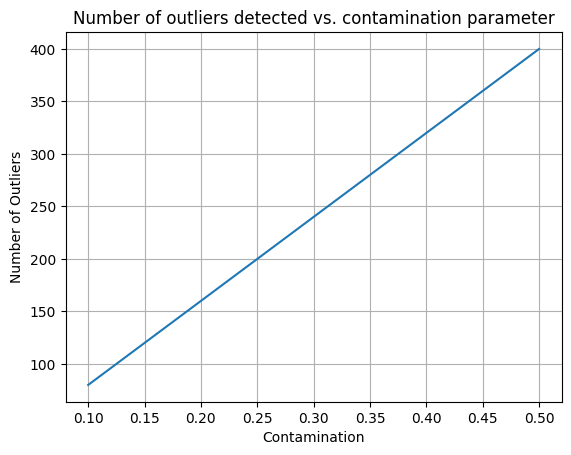

In [140]:
import numpy as np
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

df7 = pd.read_csv('Pokemon.csv')
df7['Legendary'] = df7['Legendary'].map({False : 0, True : 1})
df7 = pd.get_dummies(df7, columns=['Type 1'], drop_first = True)     
df7 = pd.get_dummies(df7, columns=['Type 2'], drop_first = True)  
df7 = df7.drop('Name', axis = 1)
contaminations = [0.1,0.2,0.3,0.4,0.5] 
n_outliers = []

for contamination in contaminations:
    iforest = IsolationForest(contamination=contamination)
    preds = iforest.fit_predict(df7)
    n_outliers.append((preds == -1).sum())  # count the number of -1's, which indicate outliers
print(n_outliers)
plt.plot(contaminations, n_outliers)
plt.title('Number of outliers detected vs. contamination parameter')
plt.xlabel('Contamination')
plt.ylabel('Number of Outliers')
plt.grid(True)
plt.show()

[80, 160, 240, 320, 400]


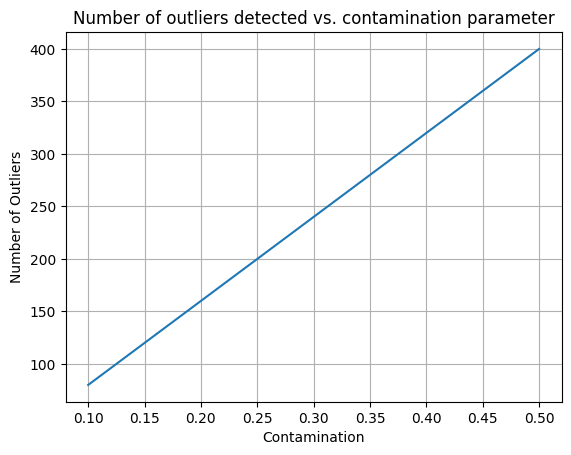

In [142]:
import numpy as np
from sklearn.covariance import EllipticEnvelope
import matplotlib.pyplot as plt

df7 = pd.read_csv('Pokemon.csv')
df7['Legendary'] = df7['Legendary'].map({False : 0, True : 1})
df7 = pd.get_dummies(df7, columns=['Type 1'], drop_first = True)     
df7 = pd.get_dummies(df7, columns=['Type 2'], drop_first = True)  
df7 = df7.drop('Name', axis = 1)
contaminations = [0.1,0.2,0.3,0.4,0.5] 
n_outliers2 = []

for contamination in contaminations:
    iforest = EllipticEnvelope(contamination=contamination)
    preds = iforest.fit_predict(df7)
    n_outliers2.append((preds == -1).sum())  # count the number of -1's, which indicate outliers
print(n_outliers2)
plt.plot(contaminations, n_outliers2)
plt.title('Number of outliers detected vs. contamination parameter')
plt.xlabel('Contamination')
plt.ylabel('Number of Outliers')
plt.grid(True)
plt.show()

[80, 160, 240, 320, 400]


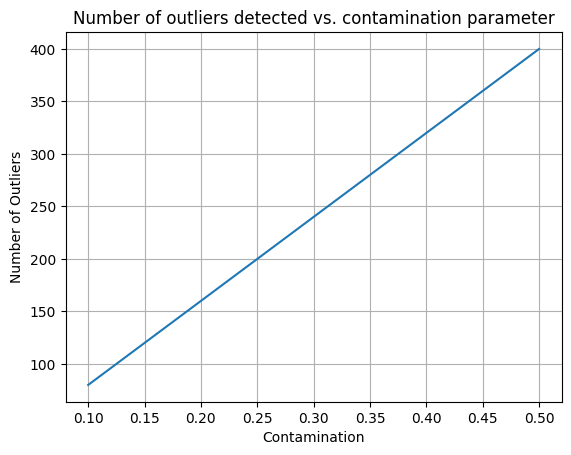

In [143]:
import numpy as np
from sklearn.neighbors import LocalOutlierFactor
import matplotlib.pyplot as plt

df7 = pd.read_csv('Pokemon.csv')
df7['Legendary'] = df7['Legendary'].map({False : 0, True : 1})
df7 = pd.get_dummies(df7, columns=['Type 1'], drop_first = True)     
df7 = pd.get_dummies(df7, columns=['Type 2'], drop_first = True)  
df7 = df7.drop('Name', axis = 1)
contaminations = [0.1,0.2,0.3,0.4,0.5] 
n_outliers2 = []

for contamination in contaminations:
    iforest = LocalOutlierFactor(contamination=contamination)
    preds = iforest.fit_predict(df7)
    n_outliers2.append((preds == -1).sum())  # count the number of -1's, which indicate outliers
print(n_outliers2)
plt.plot(contaminations, n_outliers2)
plt.title('Number of outliers detected vs. contamination parameter')
plt.xlabel('Contamination')
plt.ylabel('Number of Outliers')
plt.grid(True)
plt.show()

 ## Split the Data Set into the train and test sets

In [154]:
from sklearn.model_selection import train_test_split
X = df2.drop('Legendary', axis = 1)
Y = df2['Legendary']
X_train1, X_test1, y_train1, y_test1 = train_test_split(X,Y,test_size = 0.25, random_state = 12)

X = df3.drop('Legendary', axis = 1)
Y = df3['Legendary']
X_train2, X_test2, y_train2, y_test2 = train_test_split(X,Y,test_size = 0.25, random_state = 12)

X = df4.drop('Legendary', axis = 1)
Y = df4['Legendary']
X_train3, X_test3, y_train3, y_test3 = train_test_split(X,Y,test_size = 0.25, random_state = 12)


X = df5.drop('Legendary', axis = 1)
Y = df5['Legendary']
X_train4, X_test4, y_train4, y_test4 = train_test_split(X,Y,test_size = 0.25, random_state = 12)



##  Train on the initial and the gotten subset of the following algorithms: LinearRegression and KNN Regressor.
## Find the accuracy of each combination of the prediction and outliers detection algorithms on the test subset.

In [173]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train1,y_train1)
out1 = model.predict(X_test1)
print(mean_squared_error(y_test1,out1))
ress1 = mean_squared_error(y_test1,out1)
model = LinearRegression()
model.fit(X_train2,y_train2)
out2 = model.predict(X_test2)
print(mean_squared_error(y_test2,out2))
ress2 = mean_squared_error(y_test2,out2)
model = LinearRegression()
model.fit(X_train3,y_train3)
out3 = model.predict(X_test3)
print(mean_squared_error(y_test3,out3))
ress3 = mean_squared_error(y_test3,out3)
model = LinearRegression()
model.fit(X_train4,y_train4)
out4 = model.predict(X_test4)
print(mean_squared_error(y_test4,out4))
ress4 = mean_squared_error(y_test4,out4)

0.05474517189430514
0.05447519664637605
0.05407541641934554
0.05404916449154813


In [174]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

model = KNeighborsRegressor()
model.fit(X_train1,y_train1)
out5 = model.predict(X_test1)
print(mean_squared_error(y_test1,out5))
ress5 = mean_squared_error(y_test1,out5)
model = KNeighborsRegressor()
model.fit(X_train2,y_train2)
out6 = model.predict(X_test2)
print(mean_squared_error(y_test2,out6))
ress6 = mean_squared_error(y_test2,out6)
model = KNeighborsRegressor()
model.fit(X_train3,y_train3)
out7 = model.predict(X_test3)
print(mean_squared_error(y_test3,out7))
ress7 = mean_squared_error(y_test3,out7)
model = KNeighborsRegressor()
model.fit(X_train4,y_train4)
out8 = model.predict(X_test4)
print(mean_squared_error(y_test4,out8))
ress8 = mean_squared_error(y_test4,out8)

0.033
0.033
0.033
0.033


In [180]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

df0 = pd.read_csv('Pokemon.csv')
df0['Legendary'] = df0['Legendary'].map({False : 0, True : 1})
df0 = pd.get_dummies(df0, columns=['Type 1'], drop_first = True)     
df0 = pd.get_dummies(df0, columns=['Type 2'], drop_first = True)  
df0 = df0.drop('Name', axis = 1)

from sklearn.model_selection import train_test_split
X = df0.drop('Legendary', axis = 1)
Y = df0['Legendary']
X_train10, X_test10, y_train10, y_test10 = train_test_split(X,Y,test_size = 0.25, random_state = 12)

model = KNeighborsRegressor()
model.fit(X_train10,y_train10)
out10 = model.predict(X_test10)
print(mean_squared_error(y_test10,out10))
ooo = mean_squared_error(y_test10,out10)

0.033


In [179]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

df0 = pd.read_csv('Pokemon.csv')
df0['Legendary'] = df0['Legendary'].map({False : 0, True : 1})
df0 = pd.get_dummies(df0, columns=['Type 1'], drop_first = True)     
df0 = pd.get_dummies(df0, columns=['Type 2'], drop_first = True)  
df0 = df0.drop('Name', axis = 1)

from sklearn.model_selection import train_test_split
X = df0.drop('Legendary', axis = 1)
Y = df0['Legendary']
X_train11, X_test11, y_train11, y_test11 = train_test_split(X,Y,test_size = 0.25, random_state = 12)

model = LinearRegression()
model.fit(X_train11,y_train11)
out11 = model.predict(X_test11)
print(mean_squared_error(y_test11,out11))
oooo = mean_squared_error(y_test11,out11)

0.05474474125312458


## Create the table of the following structure.

In [176]:
dic = {
    'KNN_outlier_off': [ress5,ress6,ress7,ress8],
    'Linear Regression': [ress1,ress2,ress3,ress4]x 
}
new_df = pd.DataFrame(dic, index=['Isollation Forest','EllipticEnvelope','LocalOutlierFactor','OneClassSVM'])
new_df

,KNN_outlier_off,Linear Regression
Isollation Forest,0.033,0.054745
EllipticEnvelope,0.033,0.054475
LocalOutlierFactor,0.033,0.054075
OneClassSVM,0.033,0.054049


In [185]:
dic2 = {
    'KNN_outlier_off': [ooo],
    'Linear Regression': [oooo]
}
new_df1 = pd.DataFrame(dic2)
new_df1

,KNN_outlier_off,Linear Regression
0,0.033,0.054745
